# **Project title**: "Diabetes Prediction using Machine Learning"

### Project Overview: Diabetes Prediction
This project aims to build a machine learning model to predict whether a person has diabetes based on medical attributes such as glucose level, BMI, age, and more. We use the Pima Indians Diabetes dataset and follow a structured data analysis and modeling process:

#### **Steps Covered**:
*   **Data Cleaning** – Handled missing/invalid values (e.g., 0s in health metrics).
*   **Exploratory Data Analysis (EDA)** – Visualized distributions and correlations.
*   **Feature Scaling** – Standardized the data for modeling.
*   **Model Building** – Trained and evaluated multiple classifiers.
*   **Evaluation** – Selected the best model.
*   **Feature Importance** – Identified key predictors of diabetes.

## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Data Loading & Initial Exploration

In [2]:
df= pd.read_csv('diabetes.csv')
# lets see the shape of data
df.shape

(768, 9)

In [3]:
# Lets have a look on data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Lets check the null values
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Pregnancies**: 0 is possible (a person may not have been pregnant)

**Glucose**: 0 is NOT physiologically possible (glucose can’t be zero in a living person)

**BloodPressure**: 0 is NOT normal (0 means no blood flow—unlikely unless deceased)

**SkinThickness**: Could be zero, but in practice it's likely a missing value

**Insulin**: Zero is unlikely unless the person has no insulin production (e.g., Type 1 diabetes), but it's generally treated as missing

**BMI**: 0 is NOT possible (BMI = 0 means no body mass)

#### So we need to change it, but first lets dig down more

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Lets Check for Invalid Zeros and replace 0 with nan

In [7]:
cols_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [8]:
df[cols_with_invalid_zeros].isin([0]).sum()

,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11


In [9]:
df[cols_with_invalid_zeros]=df[cols_with_invalid_zeros].replace(0,pd.NA)

In [10]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    object 
 2   BloodPressure             733 non-null    object 
 3   SkinThickness             541 non-null    object 
 4   Insulin                   394 non-null    object 
 5   BMI                       757 non-null    object 
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 54.1+ KB


Column types got change needs to it

In [12]:
# lets Convert columns to nullable float type
for col in cols_with_invalid_zeros:
    df[col] = df[col].astype("Float64")

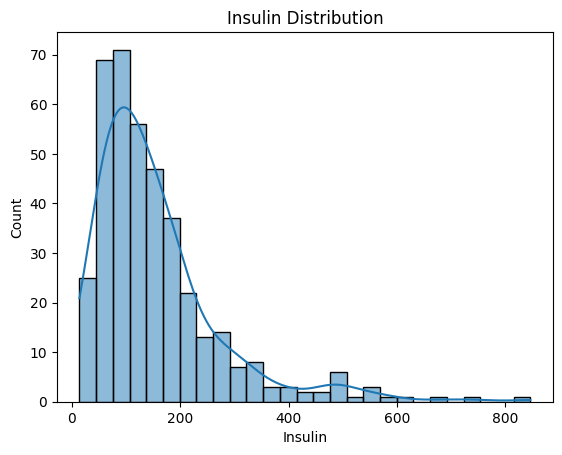

In [13]:
# lets see the distribution of insulin
sns.histplot(df['Insulin'], kde=True)
plt.title('Insulin Distribution')
plt.show()

Its better to use median than mean for handling missing value

In [14]:
#Impute Missing Values (using Median)
df.fillna(df.median(numeric_only=True),inplace=True)

In [15]:
df.isnull().sum()
# Confirm no missing values

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


## Exploratory Data Analysis (EDA)

### 1. Class Distribution

<ipython-input-16-5933e88cbb13>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette=['blue', 'red'])


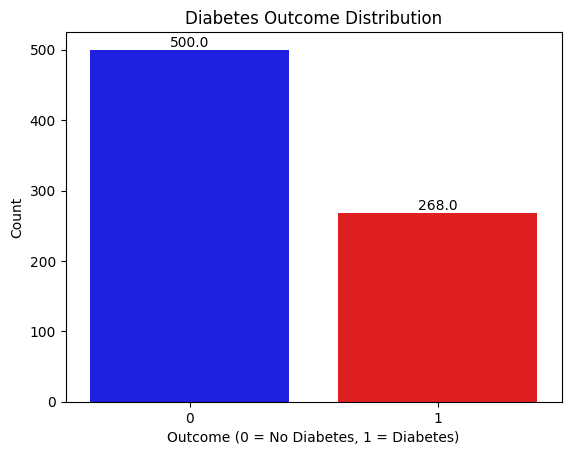

In [16]:
sns.countplot(x='Outcome', data=df, palette=['blue', 'red'])
plt.title('Diabetes Outcome Distribution')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Count')


for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

plt.show()

### 2. Histograms for Feature Distributions

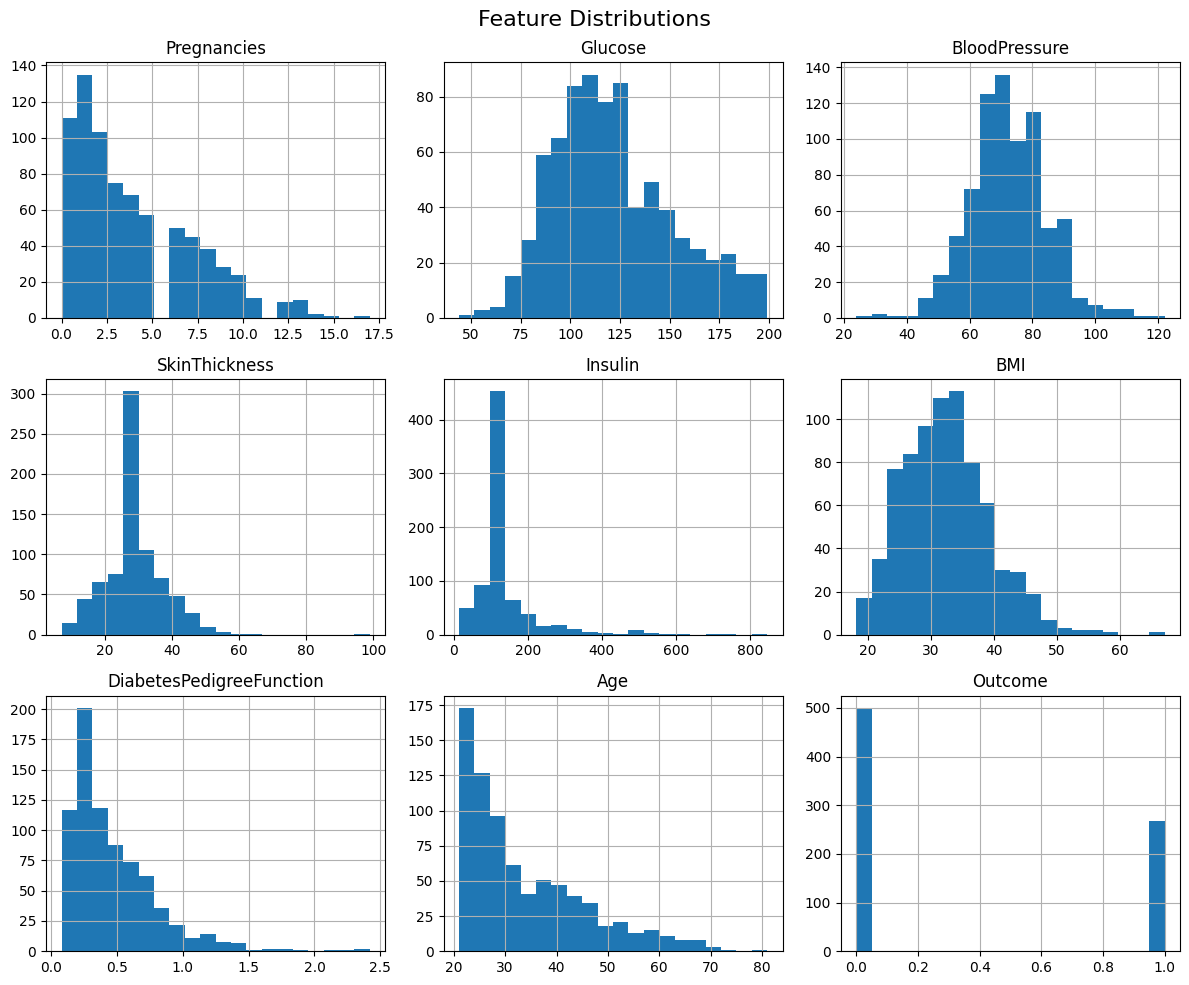

In [17]:
df.hist(figsize=(12, 10), bins=20)
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()

### 3. Boxplots to Detect Outliers

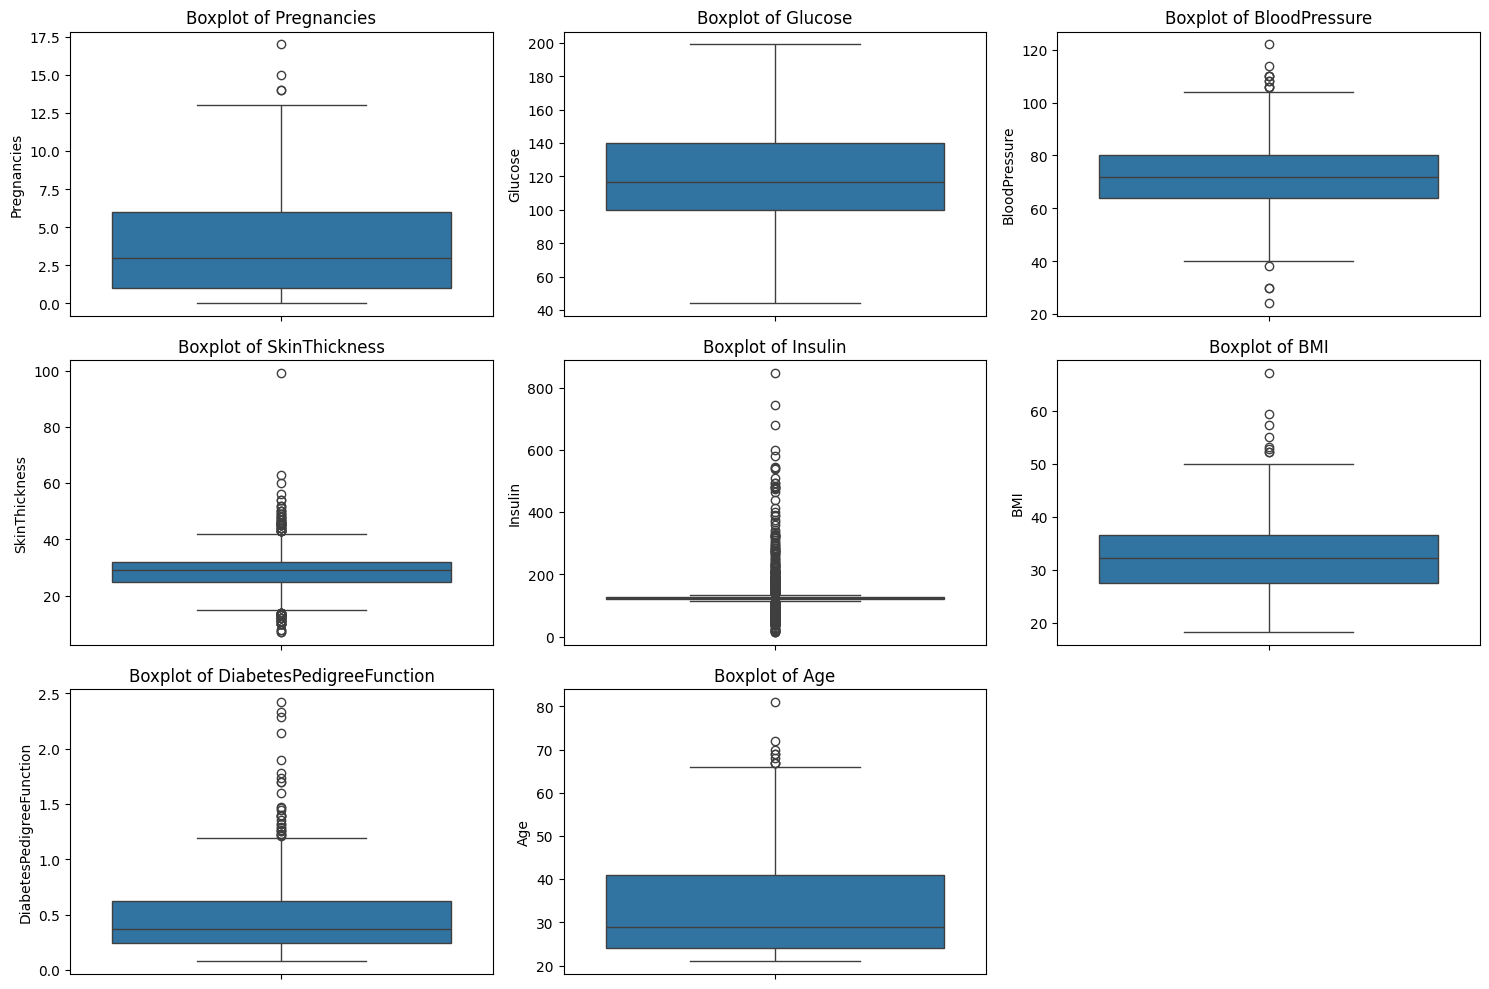

In [18]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):  # exclude 'Outcome'
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

**Pregnancies**: A few values > 13

**Glucose**: Some lower extremes < 50

**BloodPressure**: Several values below 40 and above 100

**SkinThickness**: Major outliers > 60

**Insulin**: Extreme outliers > 600 — very skewed!

**BMI**: Some values > 50–60

**DiabetesPedigreeFunction**: Heavy right-skew; outliers > 2.0

**Age**: Outliers > 70

#### For this dataset, outliers may carry real diagnostic meaning, especially in insulin or glucose—so I will keeping them for now unless they hurt our model performance later.

###  4. Correlation Heatmap

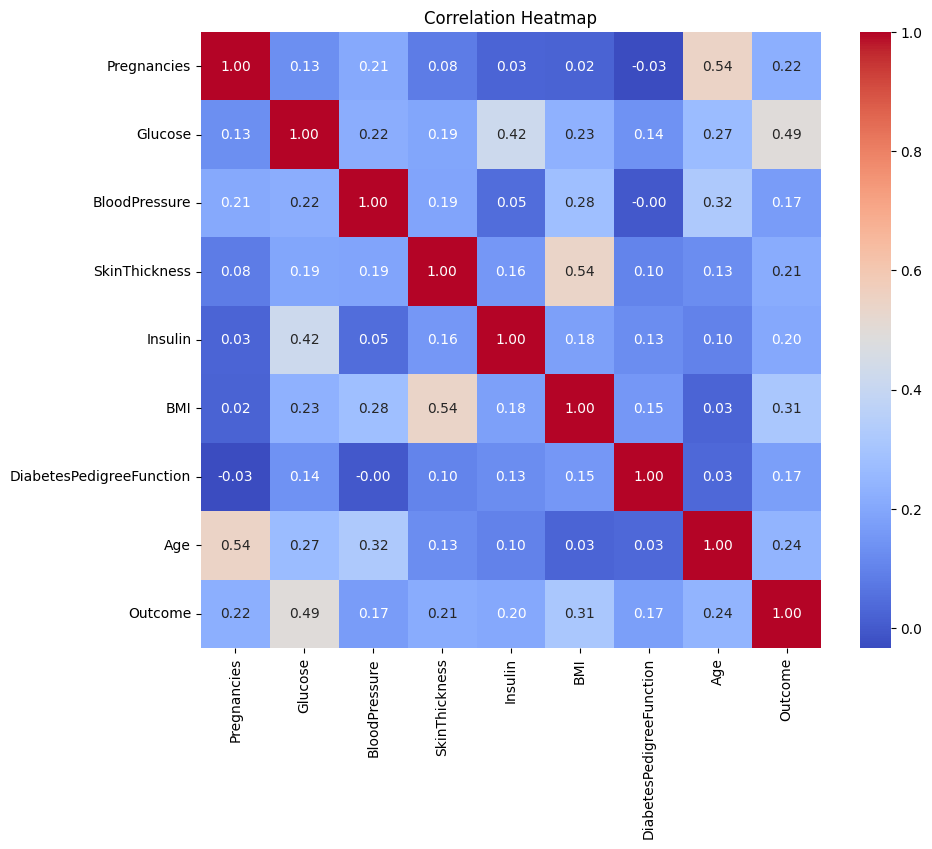

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**Correlations with Outcome:**

**Glucose (0.49)** → Strongest predictor of diabetes

**BMI (0.31)** → Positive correlation

**Age (0.24)** → Older individuals more likely to have diabetes

**Pregnancies (0.22)** → Modest positive relation


## Feature Scaling & Data Splitting

In [20]:
# Split features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

### Model Building


#### We’ll try 2 models and compare:

*   Logistic Regression – baseline
*   Random Forest – handles non-linear patterns




### 1. Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

In [22]:
# Train the model
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [23]:
# Make predictions
y_pred = log_reg.predict(X_test)

In [24]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7012987012987013

Confusion Matrix:
 [[81 19]
 [27 27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.81      0.78       100
           1       0.59      0.50      0.54        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154



**Accuracy: 70.1%**

**True Negatives (TN)**: 81 (Correctly predicted non-diabetic)

**False Positives (FP)**: 19 (Predicted diabetic, but actually non-diabetic)

**False Negatives (FN)**: 27 (Missed real diabetic cases) ❗

**True Positives (TP)**: 27

**Recall** for **Class 1 (Diabetic)** is low **(0.50)** – this is a concern because it means 50% of actual diabetic cases are being **missed**, which isn't acceptable in healthcare.

### 2. Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
print("🔹 Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\n🔹 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred_rf))

🔹 Accuracy: 0.7792207792207793

🔹 Confusion Matrix:
 [[88 12]
 [22 32]]

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       100
           1       0.73      0.59      0.65        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154



**Accuracy: 77.9%**

**+8%** improvement over logistic regression (70.1%)

Model performs **better on non-diabetic (class 0)** than diabetic (class 1), but recall for diabetic class is reasonable.

**Precision and recall** are balanced, especially compared to logistic regression.

## Feature Importance

<ipython-input-26-78250d9c94f3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='flare')


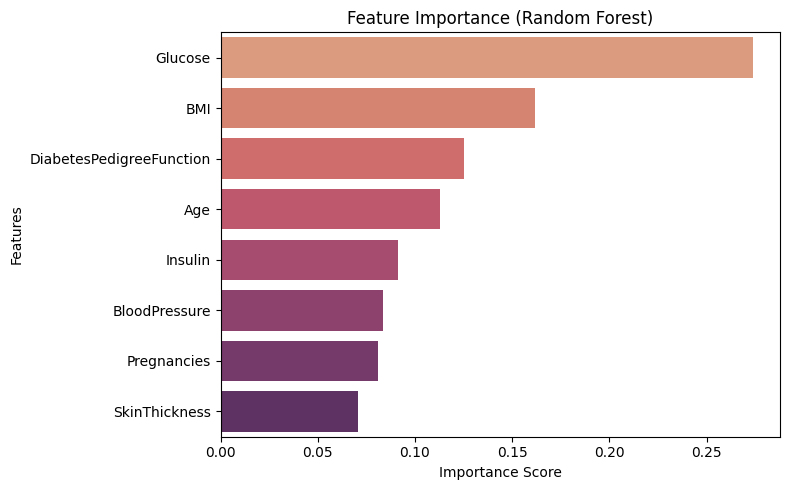

In [26]:
# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='flare')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

**Top features:** Glucose, BMI, DiabetesPedigreeFunction, and Age.

These features are most predictive for diabetes in this dataset.

## Final Summary
*   Cleaned and preprocessed the Pima Indians Diabetes dataset by handling invalid zero values and imputing missing data.
*   Performed EDA with boxplots and a correlation heatmap to understand feature distributions and relationships.
*   Scaled the features and trained multiple models.
*   Random Forest Classifier gave the best results with ~78% accuracy.
*   Glucose, BMI, and Diabetes Pedigree Function were the most important predictors.
*   This project demonstrates a complete ML workflow and provides a solid baseline for future improvements.
